<a href="https://colab.research.google.com/github/audreywagner/DataActivist---Pollution-et-trafic-portuaire/blob/audrey/Pollution_de_l'Air_DatActivist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importations

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Bovis (outside) (43.36449 5.319078) Primary Real Time 01_01_2019 12_01_2022.csv")

FileNotFoundError: ignored

In [ ]:
df

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,2020-12-31 17:39:16 UTC,1,0.87,1.33,2.13,1.0,-54.0,73.0,16.0,1.33,NaN
1,2020-12-31 17:41:16 UTC,2,1.40,2.10,2.40,3.0,-51.0,73.0,16.0,2.10,NaN
2,2020-12-31 17:43:14 UTC,3,0.67,1.58,1.77,5.0,-54.0,73.0,16.0,1.58,NaN
3,2020-12-31 17:45:14 UTC,4,0.98,1.79,1.84,7.0,-50.0,73.0,16.0,1.79,NaN
4,2020-12-31 17:47:14 UTC,5,0.68,1.67,1.74,9.0,-54.0,74.0,15.0,1.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...
595956,2022-10-25 20:05:10 UTC,350914,5.21,8.07,8.65,9593.0,-53.0,77.0,48.0,8.07,NaN
595957,2022-10-25 20:07:10 UTC,350915,5.27,7.84,8.23,9595.0,-55.0,77.0,47.0,7.84,NaN
595958,2022-10-25 20:09:10 UTC,350916,5.44,8.38,8.85,9597.0,-51.0,77.0,47.0,8.38,NaN
595959,2022-10-25 20:11:10 UTC,350917,5.75,8.59,8.95,9599.0,-51.0,77.0,47.0,8.59,NaN


# Pré traitement

In [ ]:
df.describe()

,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
count,238564.000000,238564.000000,238564.000000,238563.000000,238563.000000,238563.000000,238563.000000,238563.000000,238563.000000,0.0
mean,62472.639015,6.440272,9.180197,9.502716,24690.485553,-51.870906,77.785612,40.237979,8.988810,NaN
std,38818.979681,6.287672,9.782313,10.386341,18274.350426,2.439638,12.977008,12.191556,8.476387,NaN
min,1.000000,0.000000,0.000000,0.000000,1.000000,-69.000000,42.000000,10.000000,0.000000,NaN
25%,29895.750000,2.220000,3.240000,3.380000,9265.000000,-53.000000,69.000000,31.000000,3.240000,NaN
50%,59716.000000,5.140000,7.030000,7.260000,20618.000000,-52.000000,79.000000,41.000000,7.030000,NaN
75%,89536.250000,9.030000,12.490000,12.860000,37559.000000,-50.000000,86.000000,49.000000,12.490000,NaN
max,145001.000000,267.860000,694.860000,846.240000,71582.000000,-27.000000,115.000000,87.000000,462.610000,NaN


In [ ]:
df.assign(grade = 'z')

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10,grade
0,2020-12-31 17:39:16 UTC,1,0.87,1.33,2.13,1.0,-54.0,73.0,16.0,1.33,NaN,z
1,2020-12-31 17:41:16 UTC,2,1.40,2.10,2.40,3.0,-51.0,73.0,16.0,2.10,NaN,z
2,2020-12-31 17:43:14 UTC,3,0.67,1.58,1.77,5.0,-54.0,73.0,16.0,1.58,NaN,z
3,2020-12-31 17:45:14 UTC,4,0.98,1.79,1.84,7.0,-50.0,73.0,16.0,1.79,NaN,z
4,2020-12-31 17:47:14 UTC,5,0.68,1.67,1.74,9.0,-54.0,74.0,15.0,1.67,NaN,z
...,...,...,...,...,...,...,...,...,...,...,...,...
159802,2021-10-12 19:54:03 UTC,79915,4.54,6.76,7.12,38395.0,-51.0,66.0,37.0,6.76,NaN,z
159803,2021-10-12 19:56:03 UTC,79916,4.89,7.14,7.30,38397.0,-51.0,66.0,37.0,7.14,NaN,z
159804,2021-10-12 19:58:03 UTC,79917,4.84,6.25,6.46,38399.0,-50.0,66.0,37.0,6.25,NaN,z
159805,2021-10-12 20:00:03 UTC,79918,4.93,6.32,6.32,38401.0,-51.0,66.0,37.0,6.32,NaN,z


In [ ]:
def scoring(df):
  df = df.assign(grade = 'z')
  for i in range (len(df)):
    if df['PM2.5_CF1_ug/m3'][i] <= 10:
      df['grade'][i] = "A" 
    elif df['PM2.5_CF1_ug/m3'][i] <= 20 and df['PM2.5_CF1_ug/m3'][i] > 10:
      df['grade'][i] = "B" 
    elif df['PM2.5_CF1_ug/m3'][i] <= 60 and df['PM2.5_CF1_ug/m3'][i] > 20:
      df['grade'][i] = "C" 
    else :
      df['grade'][i] = "D"
  return(df)

In [ ]:
#Définition d'une palette de couleur
grade = {
    'A': "#058244",
    'B': "#85BD39",
    'C': "#FDCD2A",
    'D': "#ED831E",
}

In [ ]:
scoring(df[0:100])

<ipython-input-9-e4c4ae46539f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'][i] = "A"
<ipython-input-9-e4c4ae46539f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'][i] = "D"
<ipython-input-9-e4c4ae46539f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'][i] = "C"
<ipython-input-9-e4c4ae46539f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10,grade
0,2020-12-31 17:39:16 UTC,1,0.87,1.33,2.13,1.0,-54.0,73.0,16.0,1.33,NaN,A
1,2020-12-31 17:41:16 UTC,2,1.40,2.10,2.40,3.0,-51.0,73.0,16.0,2.10,NaN,A
2,2020-12-31 17:43:14 UTC,3,0.67,1.58,1.77,5.0,-54.0,73.0,16.0,1.58,NaN,A
3,2020-12-31 17:45:14 UTC,4,0.98,1.79,1.84,7.0,-50.0,73.0,16.0,1.79,NaN,A
4,2020-12-31 17:47:14 UTC,5,0.68,1.67,1.74,9.0,-54.0,74.0,15.0,1.67,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-01-08 20:43:10 UTC,96,0.07,0.32,0.40,7.0,-56.0,71.0,18.0,0.32,NaN,A
96,2021-01-08 20:45:10 UTC,97,0.05,0.29,0.75,9.0,-60.0,72.0,17.0,0.29,NaN,A
97,2021-01-08 20:47:11 UTC,98,0.21,0.49,0.89,11.0,-58.0,72.0,17.0,0.49,NaN,A
98,2021-01-08 20:49:10 UTC,99,0.14,0.47,0.83,13.0,-60.0,73.0,16.0,0.47,NaN,A


## Etude des valeurs aberrantes

- 50 μg/m3 en moyenne sur vingt-quatre heures : les agences de surveillance de la qualité de l’air informent les préfectures ainsi que les médias de la situation. 
- 80 μg/m3 : c’est à ce moment-là que certaines mesures sont mises en place (circulation alternée, limitation de la vitesse ou encore récemment, la gratuité des transports en commun en région parisienne).
- 20μg/m3 objectif de qualité à en moyenne sur l’année. 
- L’OMS recommande, quant à elle, une valeur de 10 μg/m3.


5 μg/m3 valeur moyenne annuelle
15 μg/m3 valeur moyenne sur 24 heures

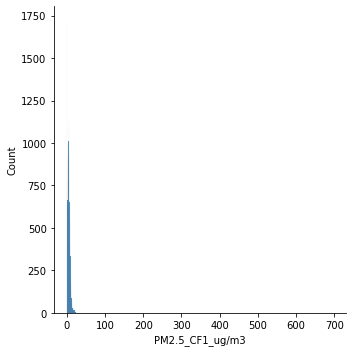

In [ ]:
sns.displot(df, x = "PM2.5_CF1_ug/m3", kind = "hist")

In [ ]:
df[df["PM2.5_CF1_ug/m3"] > 200]

27

Il y a très peu de valeurs au dessus de 200 ug par m3. Ce sont des vleurs aberrantes ? Les recommandations des institutions gouvernementales prescrivent le fait que la concentrations de PM 2.5 ne doivent pas dépasser en moyenne 80 ug par m3 dans chaque année.

In [ ]:
#Interessons nous à la distribution des valeurs de concentration inférieurs à 100 ug/m3
df_inf100 = df[df["PM2.5_CF1_ug/m3"] < 100 ]

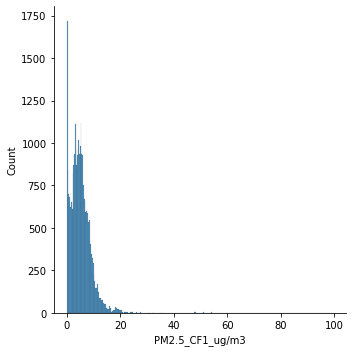

In [ ]:
sns.displot(df_inf100, x = "PM2.5_CF1_ug/m3", kind = "hist")

In [ ]:
#Interessons nous à la distribution des valeurs de concentration supérieurs à 100 ug/m3
df_sup40 = df[df["PM2.5_CF1_ug/m3"] >= 40 ] 
df_sup40100 = df_sup40[df_sup40["PM2.5_CF1_ug/m3"] <= 100]

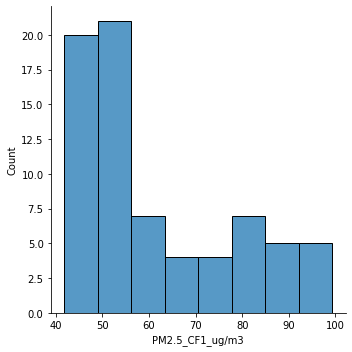

In [ ]:
sns.displot(df_sup40100, x = "PM2.5_CF1_ug/m3", kind = "hist")

In [ ]:
df_sup40100

created_at          73
entry_id            73
PM1.0_CF1_ug/m3     73
PM2.5_CF1_ug/m3     73
PM10.0_CF1_ug/m3    73
UptimeMinutes       73
RSSI_dbm            73
Temperature_F       73
Humidity_%          73
PM2.5_ATM_ug/m3     73
Unnamed: 10          0
dtype: int64

In [ ]:
#Interessons nous à la distribution des valeurs de concentration supérieurs à 100 ug/m3
df_sup100 = df[df["PM2.5_CF1_ug/m3"] >= 100 ] 

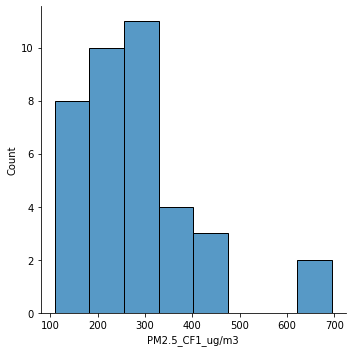

In [ ]:
sns.displot(df_sup100, x = "PM2.5_CF1_ug/m3", kind = "hist")

In [ ]:
df.columns

Index(['created_at', 'entry_id', 'PM1.0_CF1_ug/m3', 'PM2.5_CF1_ug/m3',
       'PM10.0_CF1_ug/m3', 'UptimeMinutes', 'RSSI_dbm', 'Temperature_F',
       'Humidity_%', 'PM2.5_ATM_ug/m3', 'Unnamed: 10'],
      dtype='object')

In [ ]:
df_tronq_lim = scoring(df[0:100000])

<ipython-input-19-e4c4ae46539f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'][i] = "A"
<ipython-input-19-e4c4ae46539f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'][i] = "D"
<ipython-input-19-e4c4ae46539f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'][i] = "C"
<ipython-input-19-e4c4ae46539f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [ ]:
df_tronq = df_tronq_lim[df_tronq_lim["PM2.5_CF1_ug/m3"] < 100]

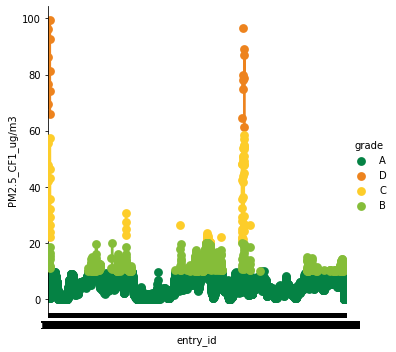

In [ ]:
graph = sns.catplot(data=df_tronq[0:100000], x='entry_id', y='PM2.5_CF1_ug/m3', kind = 'point', hue = 'grade', palette=grade)

In [ ]:
df_tronq_col = df_tronq[["created_at","entry_id","PM2.5_CF1_ug/m3"]]

In [ ]:
# Réduction du nombre de mesure : 
df_tronq_col2 = pd.DataFrame()
for i in range (len(df_tronq_col[0:200])//4):
  df_tronq_col2 = df_tronq_col2.append(df_tronq_col.iloc[df_tronq_col.index[4*i]])

In [ ]:
df_tronq_col.index[4]

33

In [ ]:
def lissage(df,seq,pas): #n est la taille de la sequence de lissage. On prend un chiffre impaire
  n = len(df)
  df_bis = pd.DataFrame()
  compt = 0
  for i in range(seq//2,(n-seq//2)//pas):
    start = df.index[pas*i - seq//2]
    end = df.index[pas*i + seq//2]
    NewRow = np.transpose(pd.DataFrame(df[start:end].mean()))
    df_bis = df_bis.append(NewRow)
  return (df_bis)

In [ ]:
np.transpose(pd.DataFrame(df[5:10].mean())).index

SyntaxError: ignored

In [ ]:
newdata = lissage(df,70,70)

<ipython-input-206-5af0fd81ab56>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NewRow = np.transpose(pd.DataFrame(df[start:end].mean()))


In [ ]:
newdata

,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,1634.500000,3.918286,5.276714,5.452714,2979.000000,-55.314286,76.485714,34.157143,5.276714,NaN
0,1149.071429,2.816000,4.148714,4.278429,2008.142857,-53.785714,72.528571,45.414286,4.148714,NaN
0,1054.500000,3.934143,6.033571,6.226857,1819.000000,-54.542857,69.528571,50.171429,6.033571,NaN
0,1124.500000,5.277143,7.867857,8.095143,1959.000000,-53.900000,69.828571,49.500000,7.867857,NaN
0,1194.500000,4.966000,7.120857,7.359857,2099.000000,-52.971429,76.114286,39.514286,7.120857,NaN
...,...,...,...,...,...,...,...,...,...,...
0,350517.500000,6.827143,10.222429,10.933286,8800.000000,-51.828571,74.285714,53.685714,10.222429,NaN
0,350587.500000,8.783571,12.849429,13.630857,8940.000000,-51.957143,86.071429,41.128571,12.849429,NaN
0,350657.500000,6.752429,10.039429,10.799429,9080.000000,-52.014286,92.842857,36.900000,10.039429,NaN
0,350727.500000,6.435857,9.498857,10.161143,9220.000000,-52.514286,91.528571,37.157143,9.498857,NaN


In [ ]:
type(newdata)

pandas.core.frame.DataFrame

In [ ]:
data_scor = scoring(newdata)

ValueError: ignored

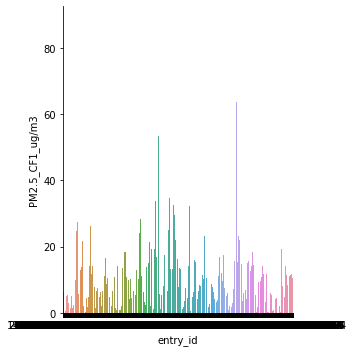

In [ ]:
sns.catplot(data=newdata, x='entry_id', y='PM2.5_CF1_ug/m3', kind = 'bar')

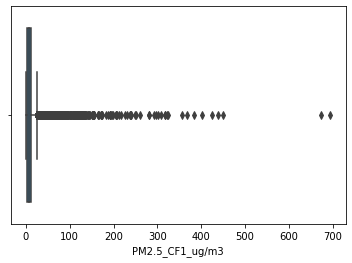

In [ ]:
sns.boxplot(x=df["PM2.5_CF1_ug/m3"])

In [ ]:
#On supprime les valeurs aberrantes

#On calcule Q1

q1=df["PM2.5_CF1_ug/m3"].quantile(q=0.25)

#On calcule Q3

q3=df["PM2.5_CF1_ug/m3"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

dfbis= df[df["PM2.5_CF1_ug/m3"]<borne_sup]
dfbis=dfbis[dfbis["PM2.5_CF1_ug/m3"]>borne_inf]

In [ ]:
df["PM2.5_CF1_ug/m3"].mean()

9.648209513709787

In [ ]:
dfbis["PM2.5_CF1_ug/m3"].mean()

8.385247674715528

In [ ]:
borne_sup

26.365000000000002

In [ ]:
borne_inf

-10.635

In [ ]:
dfcentrale = pd.read_csv("/content/Centrale.csv")

In [ ]:
#Interessons nous à la distribution des valeurs de concentration supérieurs à 100 ug/m3
dfcentrale_sup100 = dfcentrale[dfcentrale["PM2.5_CF1_ug/m3"] >= 100 ] 

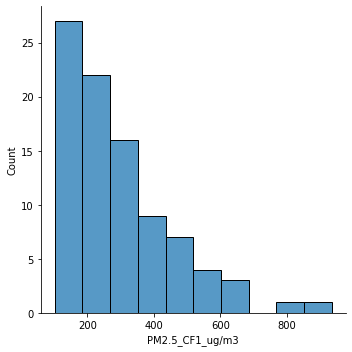

In [ ]:
sns.displot(dfcentrale_sup100, x = "PM2.5_CF1_ug/m3", kind = "hist")

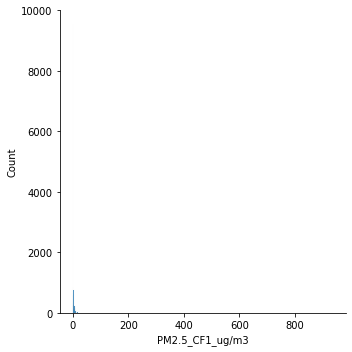

In [ ]:
sns.displot(dfcentrale, x = "PM2.5_CF1_ug/m3", kind = "hist")

In [ ]:
sorted(dfcentrale["PM2.5_CF1_ug/m3"],reverse=True)[0:10]

[934.93, 824.0, 672.29, 623.24, 613.26, 574.17, 559.16, 542.56, 521.67, 507.15]

In [ ]:
dfcentrale

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,2021-11-09 21:30:15 UTC,1,9.94,9.97,10.58,2.0,-52.0,66.0,31.0,8.47,NaN
1,2021-11-09 21:32:15 UTC,2,0.00,0.00,0.00,4.0,-50.0,70.0,31.0,0.00,NaN
2,2021-11-09 21:34:12 UTC,3,0.00,0.00,0.00,6.0,-53.0,70.0,31.0,0.00,NaN
3,2021-11-09 21:36:12 UTC,4,0.00,0.00,0.00,8.0,-49.0,70.0,31.0,0.00,NaN
4,2021-11-09 21:38:12 UTC,5,0.00,0.00,0.00,10.0,-50.0,70.0,31.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22275,2022-07-05 14:48:34 UTC,11443,0.34,1.60,1.77,1.0,-37.0,90.0,25.0,1.60,NaN
22276,2022-07-05 14:54:08 UTC,11444,0.64,1.70,1.94,1.0,-42.0,90.0,25.0,1.70,NaN
22277,2022-07-05 14:56:09 UTC,11445,0.05,1.59,1.91,3.0,-41.0,91.0,24.0,1.59,NaN
22278,2022-07-05 14:58:08 UTC,11446,0.07,1.83,1.83,5.0,-43.0,91.0,24.0,1.83,NaN


In [ ]:
dfcentraltronq = dfcentrale[1100:]

In [ ]:
dfcentraltronq

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
1100,2022-06-20 10:28:26 UTC,655,3.48,5.87,6.04,82.0,-41.0,93.0,22.0,5.87,NaN
1101,2022-06-20 10:30:26 UTC,656,4.25,6.17,6.33,84.0,-37.0,93.0,23.0,6.17,NaN
1102,2022-06-20 10:32:26 UTC,657,3.66,6.20,6.32,86.0,-37.0,93.0,23.0,6.20,NaN
1103,2022-06-20 10:34:26 UTC,658,4.02,5.80,5.95,88.0,-38.0,93.0,23.0,5.80,NaN
1104,2022-06-20 10:36:26 UTC,659,3.02,5.77,5.85,90.0,-38.0,93.0,23.0,5.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22275,2022-07-05 14:48:34 UTC,11443,0.34,1.60,1.77,1.0,-37.0,90.0,25.0,1.60,NaN
22276,2022-07-05 14:54:08 UTC,11444,0.64,1.70,1.94,1.0,-42.0,90.0,25.0,1.70,NaN
22277,2022-07-05 14:56:09 UTC,11445,0.05,1.59,1.91,3.0,-41.0,91.0,24.0,1.59,NaN
22278,2022-07-05 14:58:08 UTC,11446,0.07,1.83,1.83,5.0,-43.0,91.0,24.0,1.83,NaN


In [ ]:
dfcentraltronq[dfcentraltronq["PM2.5_CF1_ug/m3"] >20]

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
3147,2022-06-22 06:43:47 UTC,1982,10.49,20.09,20.27,1242.0,-43.0,87.0,47.0,20.09,NaN
3867,2022-06-22 06:43:47 UTC,1982,10.49,20.09,20.27,1242.0,-43.0,87.0,47.0,20.09,NaN


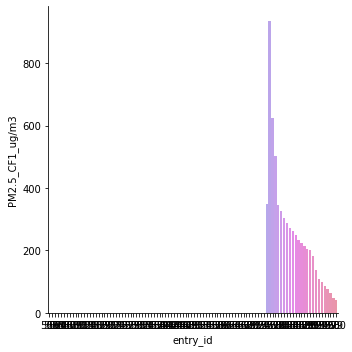

In [ ]:
sns.catplot(data=dfcentrale[500 : 600], x='entry_id', y='PM2.5_CF1_ug/m3', kind = 'bar')

In [ ]:
dfcentrale[500 : 600]

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
500,2021-11-10 14:13:05 UTC,501,0.00,0.00,0.00,980.0,-45.0,70.0,31.0,0.00,NaN
501,2021-11-10 14:15:05 UTC,502,0.00,0.00,0.00,982.0,-48.0,70.0,31.0,0.00,NaN
502,2021-11-10 14:17:05 UTC,503,0.00,0.00,0.00,984.0,-45.0,70.0,31.0,0.00,NaN
503,2021-11-10 14:19:05 UTC,504,0.00,0.00,0.00,986.0,-47.0,70.0,31.0,0.00,NaN
504,2021-11-10 14:21:05 UTC,505,0.00,0.00,0.00,988.0,-50.0,70.0,31.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
595,2021-11-11 22:10:42 UTC,596,48.23,86.55,96.09,43.0,-50.0,82.0,20.0,57.17,NaN
596,2021-11-11 22:12:42 UTC,597,42.96,76.30,81.79,45.0,-47.0,82.0,20.0,51.13,NaN
597,2021-11-11 22:14:42 UTC,598,36.37,63.24,68.93,47.0,-50.0,82.0,20.0,46.48,NaN
598,2021-11-11 22:16:42 UTC,599,28.23,49.05,52.59,49.0,-52.0,82.0,20.0,40.43,NaN


In [ ]:
df

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,2020-12-31 17:39:16 UTC,1,0.87,1.33,2.13,1.0,-54.0,73.0,16.0,1.33,NaN
1,2020-12-31 17:41:16 UTC,2,1.40,2.10,2.40,3.0,-51.0,73.0,16.0,2.10,NaN
2,2020-12-31 17:43:14 UTC,3,0.67,1.58,1.77,5.0,-54.0,73.0,16.0,1.58,NaN
3,2020-12-31 17:45:14 UTC,4,0.98,1.79,1.84,7.0,-50.0,73.0,16.0,1.79,NaN
4,2020-12-31 17:47:14 UTC,5,0.68,1.67,1.74,9.0,-54.0,74.0,15.0,1.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...
595956,2022-10-25 20:05:10 UTC,350914,5.21,8.07,8.65,9593.0,-53.0,77.0,48.0,8.07,NaN
595957,2022-10-25 20:07:10 UTC,350915,5.27,7.84,8.23,9595.0,-55.0,77.0,47.0,7.84,NaN
595958,2022-10-25 20:09:10 UTC,350916,5.44,8.38,8.85,9597.0,-51.0,77.0,47.0,8.38,NaN
595959,2022-10-25 20:11:10 UTC,350917,5.75,8.59,8.95,9599.0,-51.0,77.0,47.0,8.59,NaN


In [ ]:
sorted(df["PM2.5_CF1_ug/m3"],reverse=True)[0:10]

[830.05,
 830.05,
 824.76,
 824.76,
 694.86,
 674.53,
 448.84,
 438.86,
 424.14,
 417.47]

In [ ]:
df[df["PM2.5_CF1_ug/m3"] ==830.05]

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
333918,2022-04-25 22:43:09 UTC,220238,493.85,830.05,284.7,24466.0,-55.0,65.0,55.0,19.38,NaN
334638,2022-04-25 22:43:09 UTC,220238,493.85,830.05,284.7,24466.0,-55.0,65.0,55.0,19.38,NaN


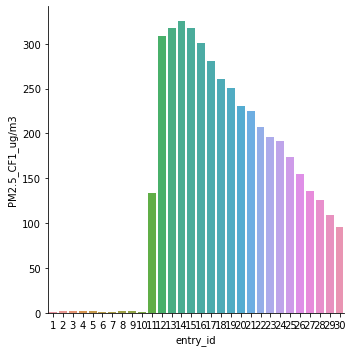

In [ ]:
sns.catplot(data=df[0:30], x='entry_id', y='PM2.5_CF1_ug/m3', kind = 'bar')

#Analyse météorologique

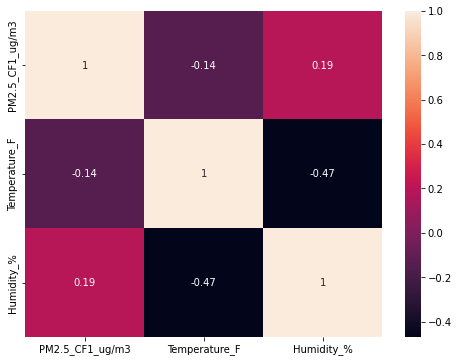

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfcorr = df[["PM2.5_CF1_ug/m3","Temperature_F","Humidity_%"]]
corr_df = dfcorr.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()